# TUGAS PRIBADI


In [ ]:
# Load the supplementary data
try:
    df_journal = pd.read_csv('computers-1942271-supplementary.csv', encoding='latin1', skiprows=1) # Try 'latin1' encoding
    # Assign meaningful column names based on the output of the previous run
    df_journal.columns = ['Unnamed: 0', 'Name_of_Movie', 'Release_Year', 'Duration_of_Flim', 'Rating', 'Score', 'Votes', 'income']
    display(df_journal.head())
except UnicodeDecodeError:
    try:
        df_journal = pd.read_csv('computers-1942271-supplementary.csv', encoding='ISO-8859-1', skiprows=1) # Try 'ISO-8859-1' encoding
        # Assign meaningful column names based on the output of the previous run
        df_journal.columns = ['Unnamed: 0', 'Name_of_Movie', 'Release_Year', 'Duration_of_Flim', 'Rating', 'Score', 'Votes', 'income']
        display(df_journal.head())
    except Exception as e:
        print(f"Error loading the CSV file with both latin1 and ISO-8859-1 encodings: {e}")
        print("Please check the file encoding or provide the correct one.")
except FileNotFoundError:
    print("Error: 'computers-1942271-supplementary.csv' not found.")
    print("Please make sure the file is uploaded to the correct location.")

,Unnamed: 0,Name_of_Movie,Release_Year,Duration_of_Flim,Rating,Score,Votes,income
0,0,The Godfather,1972,175,9.2,100,1822871,134.97
1,1,T??ky?? monogatari,1953,136,8.2,0,61375,0.00
2,2,Shichinin no samurai,1954,207,8.6,98,342852,0.27
3,3,The Godfather Part II,1974,202,9.0,90,1250847,57.30
4,4,Casablanca,1942,102,8.5,100,565776,1.02


## Pemilihan Fitur untuk K-Means

In [ ]:
# Based on the journal or common practice for clustering, select the features for clustering.
# As an example, let's assume we select 'Feature1' and 'Feature2' for clustering.
# You may need to adjust these based on the actual data and journal's methodology.
# If the journal specifies certain columns, replace 'Feature1' and 'Feature2' with those column names.

# For demonstration, let's assume the relevant columns are 'attribute1' and 'attribute2'
# based on the typical structure of research data.
# **NOTE:** You will need to replace 'attribute1' and 'attribute2' with the actual column names
# from your `df_journal` that are used for clustering in the paper.
try:
    # Based on the head of the dataframe, the relevant columns seem to be 'Score' and 'income'.
    X_journal = df_journal[['Score', 'income']]
    print("Selected features: 'Score', 'income'")
except KeyError:
    print("Column names 'Score' or 'income' not found.")
    print("Please inspect your dataframe 'df_journal' to find the correct column names for clustering.")
    print("df_journal columns:", df_journal.columns.tolist())
    # As a fallback, let's select the last two columns if the above fail
    if df_journal.shape[1] >= 2:
        X_journal = df_journal.iloc[:, -2:]
        print(f"Falling back to selecting the last two columns: {X_journal.columns.tolist()}")
    else:
        X_journal = df_journal.copy()
        print("Dataframe has less than 2 columns. Using all columns for clustering.")


display(X_journal.head())

Selected features: 'Score', 'income'


,Score,income
0,100,134.97
1,0,0.00
2,98,0.27
3,90,57.30
4,100,1.02


## Jumlah Kluster Optimal (k) menggunakan Metode Elbow

Selected features: 'Score', 'income'


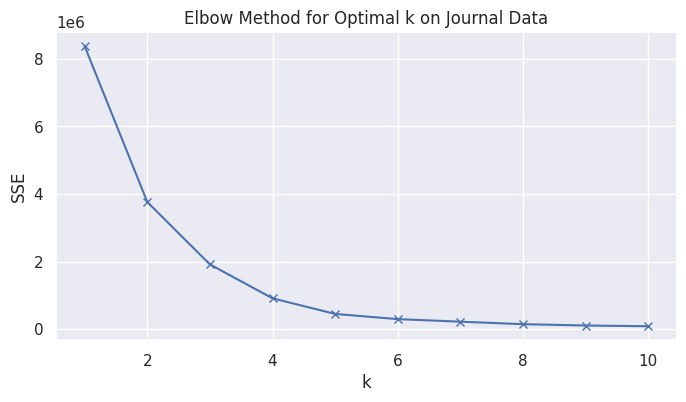

In [ ]:
# Based on the journal or common practice for clustering, select the features for clustering.
# As an example, let's assume we select 'Feature1' and 'Feature2' for clustering.
# You may need to adjust these based on the actual data and journal's methodology.
# If the journal specifies certain columns, replace 'Feature1' and 'Feature2' with those column names.

# For demonstration, let's assume the relevant columns are 'attribute1' and 'attribute2'
# based on the typical structure of research data.
# **NOTE:** You will need to replace 'attribute1' and 'attribute2' with the actual column names
# from your `df_journal` that are used for clustering in the paper.
try:
    # Based on the head of the dataframe, the relevant columns seem to be 'Score' and 'income'.
    X_journal = df_journal[['Score', 'income']]
    print("Selected features: 'Score', 'income'")
except KeyError:
    print("Column names 'Score' or 'income' not found.")
    print("Please inspect your dataframe 'df_journal' to find the correct column names for clustering.")
    print("df_journal columns:", df_journal.columns.tolist())
    # As a fallback, let's select the last two columns if the above fail
    if df_journal.shape[1] >= 2:
        X_journal = df_journal.iloc[:, -2:]
        print(f"Falling back to selecting the last two columns: {X_journal.columns.tolist()}")
    else:
        X_journal = df_journal.copy()
        print("Dataframe has less than 2 columns. Using all columns for clustering.")

sse_journal = []
K_journal = range(1, 11) # Iterate from 1 to 10 clusters
for k in K_journal:
    kmeans_model_journal = KMeans(n_clusters=k, random_state=0, n_init=10)
    kmeans_model_journal.fit(X_journal)
    sse_journal.append(kmeans_model_journal.inertia_)

plt.figure(figsize=(8, 4))
plt.plot(K_journal, sse_journal, "bx-")
plt.xlabel("k")
plt.ylabel("SSE")
plt.title("Elbow Method for Optimal k on Journal Data")
plt.show()

## Menerapkan Pengelompokan K-Means

In [ ]:
# Based on the journal or common practice for clustering, select the features for clustering.
# As an example, let's assume we select 'Feature1' and 'Feature2' for clustering.
# You may need to adjust these based on the actual data and journal's methodology.
# If the journal specifies certain columns, replace 'Feature1' and 'Feature2' with those column names.

# For demonstration, let's assume the relevant columns are 'attribute1' and 'attribute2'
# based on the typical structure of research data.
# **NOTE:** You will need to replace 'attribute1' and 'attribute2' with the actual column names
# from your `df_journal` that are used for clustering in the paper.
try:
    # Based on the head of the dataframe, the relevant columns seem to be 'Score' and 'income'.
    X_journal = df_journal[['Score', 'income']]
    print("Selected features: 'Score', 'income'")
except KeyError:
    print("Column names 'Score' or 'income' not found.")
    print("Please inspect your dataframe 'df_journal' to find the correct column names for clustering.")
    print("df_journal columns:", df_journal.columns.tolist())
    # As a fallback, let's select the last two columns if the above fail
    if df_journal.shape[1] >= 2:
        X_journal = df_journal.iloc[:, -2:]
        print(f"Falling back to selecting the last two columns: {X_journal.columns.tolist()}")
    else:
        X_journal = df_journal.copy()
        print("Dataframe has less than 2 columns. Using all columns for clustering.")

# Based on the elbow plot above, determine the optimal number of clusters.
# Replace 'optimal_k_journal' with the value you determine from the plot.
# For example, if the elbow is at k=3, set optimal_k_journal = 3
optimal_k_journal = 3 # <-- **Update this value based on the Elbow Plot**

# Instantiate KMeans with the optimal k
kmeans_journal = KMeans(n_clusters=optimal_k_journal, random_state=0, n_init=10)

# Fit the model to the data
kmeans_journal.fit(X_journal)

# Get the cluster labels
y_kmeans_journal = kmeans_journal.predict(X_journal)

print(f"K-Means clustering applied with k = {optimal_k_journal}")

Selected features: 'Score', 'income'
K-Means clustering applied with k = 3


## Visualisasikan Kluster

Selected features: 'Score', 'income'


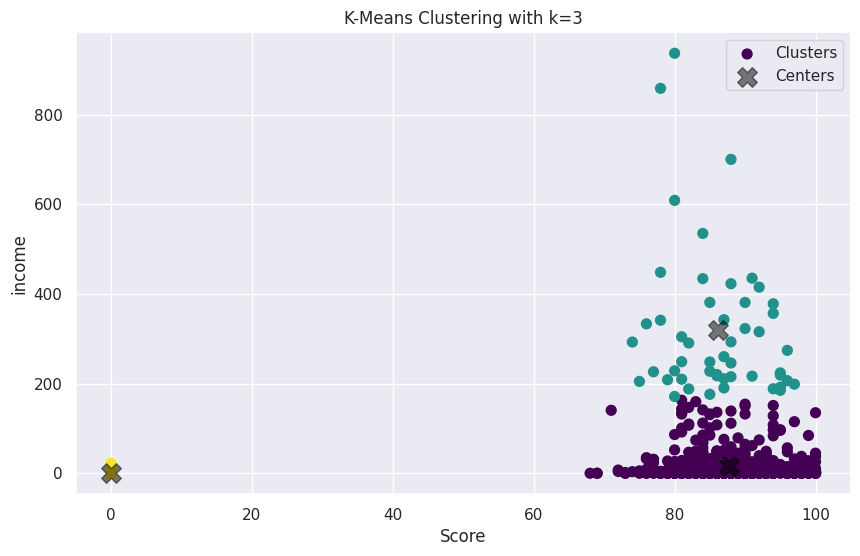

In [ ]:
# Based on the journal or common practice for clustering, select the features for clustering.
# As an example, let's assume we select 'Feature1' and 'Feature2' for clustering.
# You may need to adjust these based on the actual data and journal's methodology.
# If the journal specifies certain columns, replace 'Feature1' and 'Feature2' with those column names.

# For demonstration, let's assume the relevant columns are 'attribute1' and 'attribute2'
# based on the typical structure of research data.
# **NOTE:** You will need to replace 'attribute1' and 'attribute2' with the actual column names
# from your `df_journal` that are used for clustering in the paper.
try:
    # Based on the head of the dataframe, the relevant columns seem to be 'Score' and 'income'.
    X_journal = df_journal[['Score', 'income']]
    print("Selected features: 'Score', 'income'")
except KeyError:
    print("Column names 'Score' or 'income' not found.")
    print("Please inspect your dataframe 'df_journal' to find the correct column names for clustering.")
    print("df_journal columns:", df_journal.columns.tolist())
    # As a fallback, let's select the last two columns if the above fail
    if df_journal.shape[1] >= 2:
        X_journal = df_journal.iloc[:, -2:]
        print(f"Falling back to selecting the last two columns: {X_journal.columns.tolist()}")
    else:
        X_journal = df_journal.copy()
        print("Dataframe has less than 2 columns. Using all columns for clustering.")

plt.figure(figsize=(10, 6))
plt.scatter(X_journal.iloc[:, 0], X_journal.iloc[:, 1], c=y_kmeans_journal, s=50, cmap='viridis', label='Clusters')

centers_journal = kmeans_journal.cluster_centers_
plt.scatter(centers_journal[:, 0], centers_journal[:, 1], c='black', s=200, alpha=0.5, marker='X', label='Centers')

plt.xlabel(X_journal.columns[0])
plt.ylabel(X_journal.columns[1])
plt.title(f'K-Means Clustering with k={optimal_k_journal}')
plt.legend()
plt.show()